# Introduction
Below is code to produce EDA of all variables


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import seaborn as sns
from statsmodels.tsa.stattools import adfuller

###pH Levels
https://www.epa.gov/climate-indicators/climate-change-indicators-ocean-acidity

In [ ]:
hawaii=pd.read_csv("https://www.epa.gov/system/files/other-files/2024-06/ocean-acidity_fig-1.csv", encoding='ISO-8859-1',skiprows=6)
hawaii=hawaii.iloc[:, :-13]
hawaii.dropna(inplace=True)
hawaii

,Hawaii Year,Hawaii pH,Hawaii pCO2
0,1988.833333,8.1097,330.9
1,1988.920765,8.1092,330.6
2,1989.021918,8.1168,324.3
3,1989.156164,8.1316,310.9
4,1989.235616,8.1218,317.7
...,...,...,...
325,2022.238356,8.0522,390.5
326,2022.402740,8.0376,404.3
327,2022.523288,8.0491,396.2
328,2022.580822,8.0368,409.0


In [ ]:
# Rename and set datetime column
decimal_years = hawaii['Hawaii Year']

def decimal_to_datetime(decimal_year):
    year = int(decimal_year)  # Extract the year (integer part)
    fraction = decimal_year - year  # Get the fractional part

    # Calculate the month (assuming 12 months, each month is roughly 1/12 of a year)
    month = int(fraction * 12) + 1  # Multiply by 12 to get the month index

    # Create a datetime object (set day to 1 for simplicity)
    return pd.Timestamp(year=year, month=month, day=1)

# Apply the function to the whole column
converted_dates = [decimal_to_datetime(dy) for dy in decimal_years]

# Convert to DataFrame
hawaii['time'] = hawaii['Hawaii Year'].apply(decimal_to_datetime)
hawaii

,Hawaii Year,Hawaii pH,Hawaii pCO2,time
0,1988.833333,8.1097,330.9,1988-10-01
1,1988.920765,8.1092,330.6,1988-12-01
2,1989.021918,8.1168,324.3,1989-01-01
3,1989.156164,8.1316,310.9,1989-02-01
4,1989.235616,8.1218,317.7,1989-03-01
...,...,...,...,...
325,2022.238356,8.0522,390.5,2022-03-01
326,2022.402740,8.0376,404.3,2022-05-01
327,2022.523288,8.0491,396.2,2022-07-01
328,2022.580822,8.0368,409.0,2022-07-01


<ipython-input-83-90afa3aad267>:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


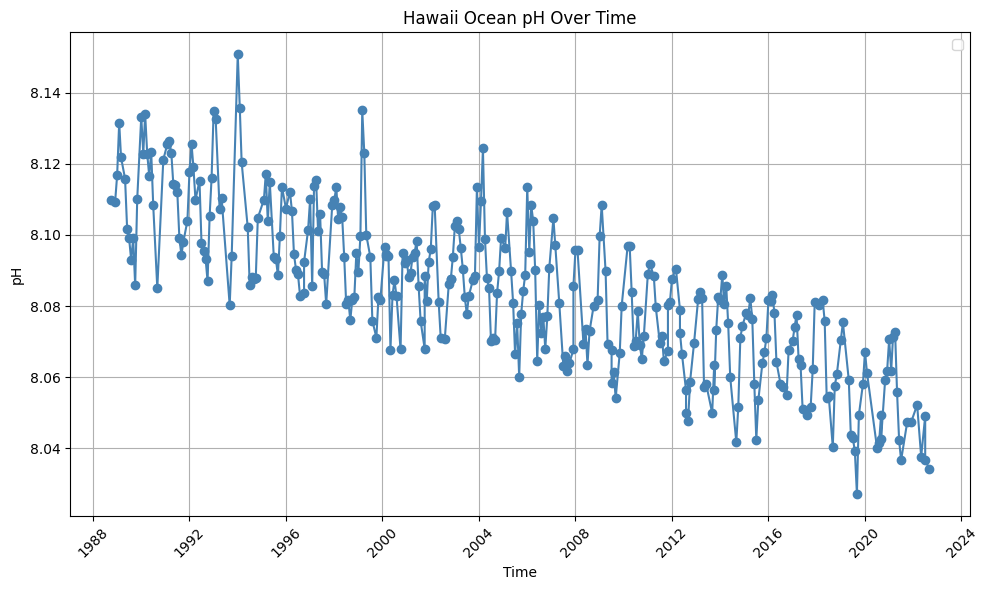

In [ ]:
ph=hawaii[['time','Hawaii pH']].copy()

plt.figure(figsize=(10, 6))
plt.plot(ph['time'], ph['Hawaii pH'],marker='o', linestyle='-', color='steelblue')
plt.title('Hawaii Ocean pH Over Time')
plt.xlabel('Time')
plt.ylabel('pH')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()

###CO2 (same source)

<ipython-input-84-50d1580ddfa2>:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


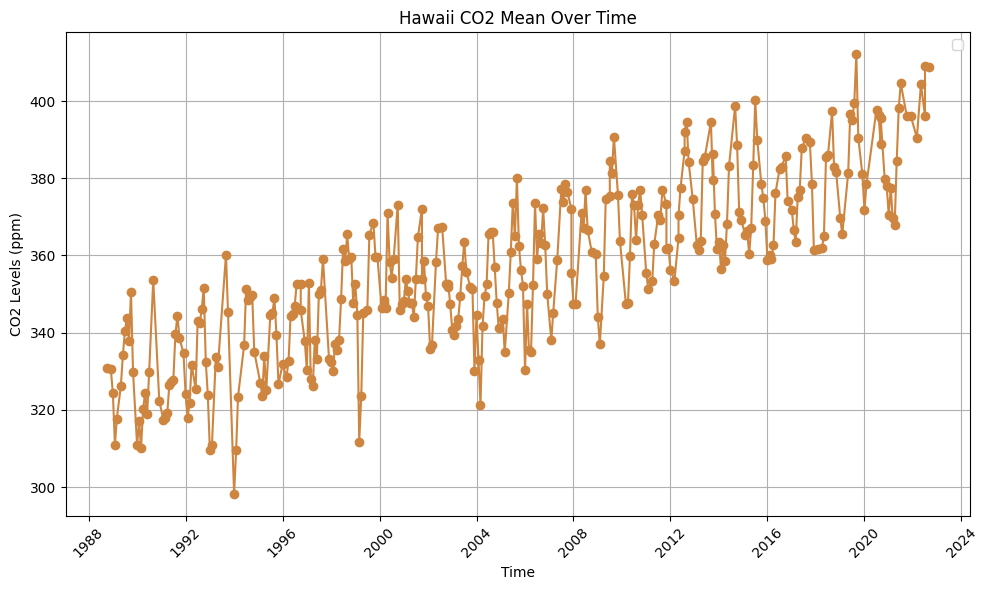

In [ ]:
co2=hawaii[['time','Hawaii pCO2']].copy()

plt.figure(figsize=(10, 6))
plt.plot(co2['time'], co2['Hawaii pCO2'], marker='o', linestyle='-', color='peru')
plt.title('Hawaii CO2 Mean Over Time')
plt.xlabel('Time')
plt.ylabel('CO2 Levels (ppm)')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()


###Sea Surface Temp
https://www.st.nmfs.noaa.gov/nauplius/pickup/d3ba06fece054bc8b43ee95de8f98c43/

In [ ]:
temp=pd.read_csv("https://www.st.nmfs.noaa.gov/nauplius/pickup/d3ba06fece054bc8b43ee95de8f98c43/data/dataRSST_HadISST.csv")
temp.head()

,DATE-YMD,HSST= HadISST Temperature (C),Unnamed: 2
0,1900-01-15,23.71,NaN
1,1900-02-15,23.31,NaN
2,1900-03-15,23.27,NaN
3,1900-04-15,23.52,NaN
4,1900-05-15,24.26,NaN


In [ ]:
temp = temp.rename(columns={'DATE-YMD':'time','HSST= HadISST Temperature (C)':'Ocean Surface Temperature (C)'})
temp['time'] = pd.to_datetime(temp.time)
temp=temp.drop(columns='Unnamed: 2')
temp.head()

,time,Ocean Surface Temperature (C)
0,1900-01-15,23.71
1,1900-02-15,23.31
2,1900-03-15,23.27
3,1900-04-15,23.52
4,1900-05-15,24.26


<ipython-input-87-78436a4b1af5>:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


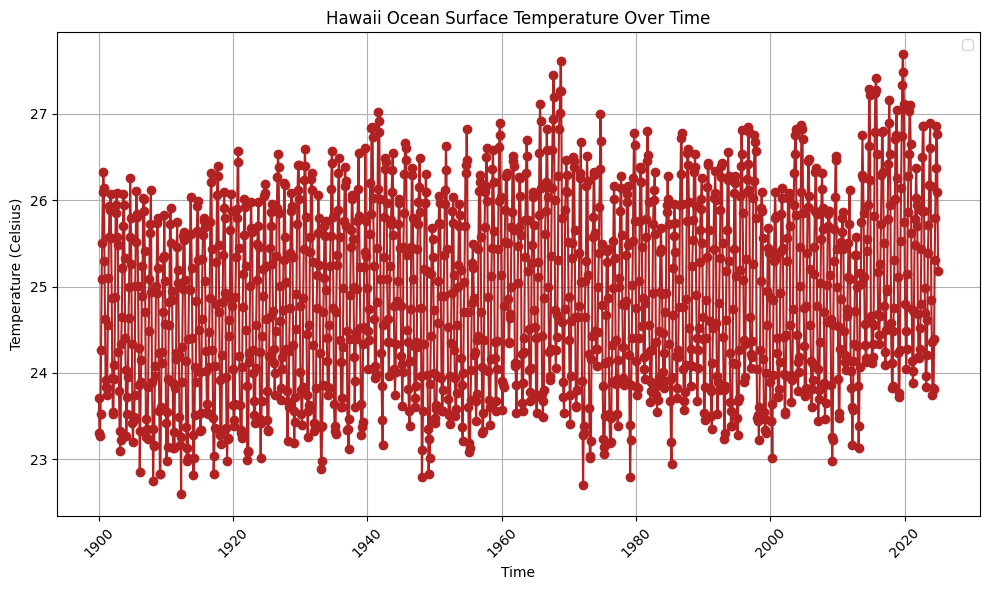

In [ ]:
x=temp['time']
y=temp['Ocean Surface Temperature (C)']

plt.figure(figsize=(10, 6))
plt.plot(x, y,marker='o', linestyle='-', color='firebrick')
plt.title('Hawaii Ocean Surface Temperature Over Time')
plt.xlabel('Time')
plt.ylabel('Temperature (Celsius)')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

### Global Temperature
https://www.ncei.noaa.gov/access/monitoring/climate-at-a-glance/global/time-series

In [ ]:
global_temp=pd.read_csv("https://www.ncei.noaa.gov/access/monitoring/climate-at-a-glance/global/time-series/globe/tavg/land_ocean/1/2/1850-2025/data.csv", skiprows=4)
global_temp.head()

,Year,Anomaly
0,1850,-0.17
1,1851,-0.03
2,1852,-0.20
3,1853,-0.21
4,1854,-0.15


In [ ]:
global_temp = global_temp.rename(columns={'Year':'time','Anomaly':'Global Temperature Anomaly (C)'})
global_temp['time'] = pd.to_datetime(global_temp.time, format='%Y')
global_temp.head()

,time,Global Temperature Anomaly (C)
0,1850-01-01,-0.17
1,1851-01-01,-0.03
2,1852-01-01,-0.20
3,1853-01-01,-0.21
4,1854-01-01,-0.15


<ipython-input-90-d9b464207865>:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


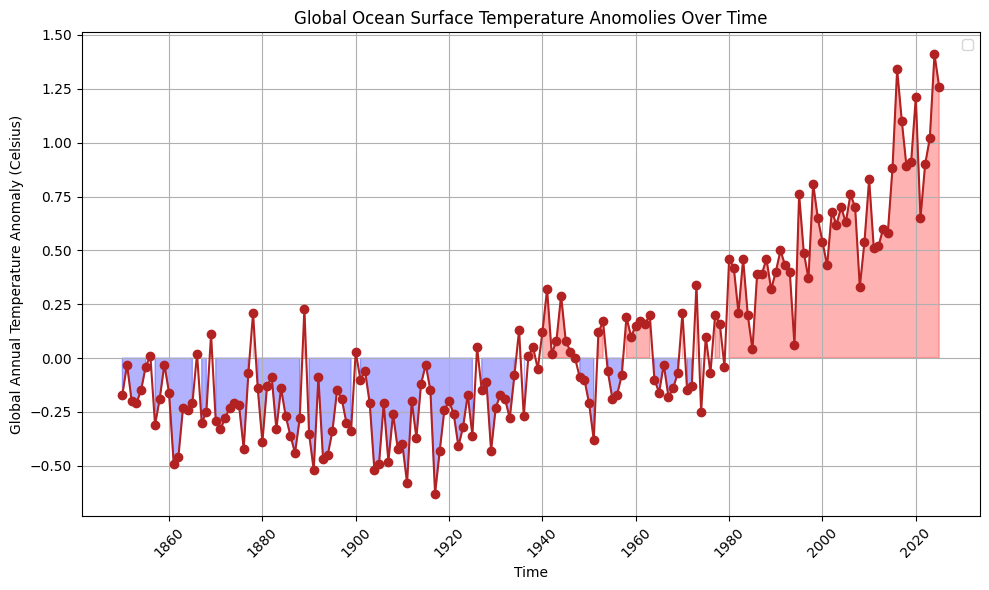

In [ ]:
x=global_temp['time']
y=global_temp['Global Temperature Anomaly (C)']

plt.figure(figsize=(10, 6))
plt.errorbar(x, y,marker='o', linestyle='-', color='firebrick')
plt.title('Global Ocean Surface Temperature Anomolies Over Time')
plt.fill_between(x, y, where=(y > 0), color='red', alpha=0.3)
plt.fill_between(x, y, where=(y < 0), color='blue', alpha=0.3)
plt.xlabel('Time')
plt.ylabel('Global Annual Temperature Anomaly (Celsius)')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

### Volcano Eruptions

https://volcano.si.edu/

In [ ]:
volc_dict= {
    "Year": [1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999,
             2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
             2016, 2017, 2018, 2019, 2020, 2021, 2022],
    "Eruptions": [60, 75, 64, 64, 57, 60, 67, 61, 60, 62, 65, 61, 56, 59, 70,
                  75, 70, 74, 65, 81, 83, 86, 81, 86, 75, 77, 76, 81, 80, 79, 90,
                  86, 75, 82, 75, 72, 82, 84]
}
volcano = pd.DataFrame(volc_dict)
volcano.head()

,Year,Eruptions
0,1985,60
1,1986,75
2,1987,64
3,1988,64
4,1989,57


In [ ]:
volcano['time'] = pd.to_datetime(volcano['Year'], format='%Y')
volcano=volcano.drop(columns='Year')
volcano.head()

,Eruptions,time
0,60,1985-01-01
1,75,1986-01-01
2,64,1987-01-01
3,64,1988-01-01
4,57,1989-01-01


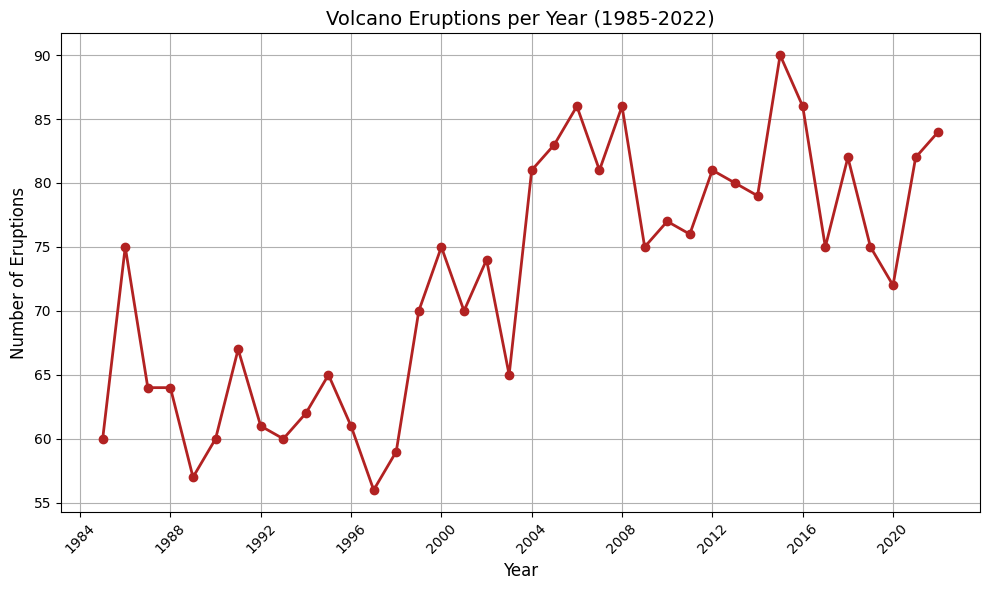

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(volcano['time'], volcano['Eruptions'], marker='o', color='firebrick', linestyle='-', linewidth=2, markersize=6)

# Add labels and title
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Eruptions', fontsize=12)
plt.title('Volcano Eruptions per Year (1985-2022)', fontsize=14)

# Display the plot
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

###Plankton Population
https://www.st.nmfs.noaa.gov/nauplius/pickup/d3ba06fece054bc8b43ee95de8f98c43/

In [ ]:
plank=pd.read_csv("https://www.st.nmfs.noaa.gov/nauplius/pickup/d3ba06fece054bc8b43ee95de8f98c43/data/dataNPP_CbPM2.csv")
plank.head()

,DATE-YMD,CHLA= CbPM2 NPP (mg-C/m2/day),Unnamed: 2
0,2003-01-15,469.104,NaN
1,2003-02-15,367.183,NaN
2,2003-03-15,307.755,NaN
3,2003-04-15,392.172,NaN
4,2003-05-15,328.367,NaN


In [ ]:
plank = plank.rename(columns={'DATE-YMD':'time', 'CHLA= CbPM2 NPP (mg-C/m2/day)':'Chlorophyll Levels (mg-C/m2/day)'})
plank['time'] = pd.to_datetime(plank.time)
plank=plank.drop(columns='Unnamed: 2')
plank.head()

,time,Chlorophyll Levels (mg-C/m2/day)
0,2003-01-15,469.104
1,2003-02-15,367.183
2,2003-03-15,307.755
3,2003-04-15,392.172
4,2003-05-15,328.367


<ipython-input-96-300c038d7a90>:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


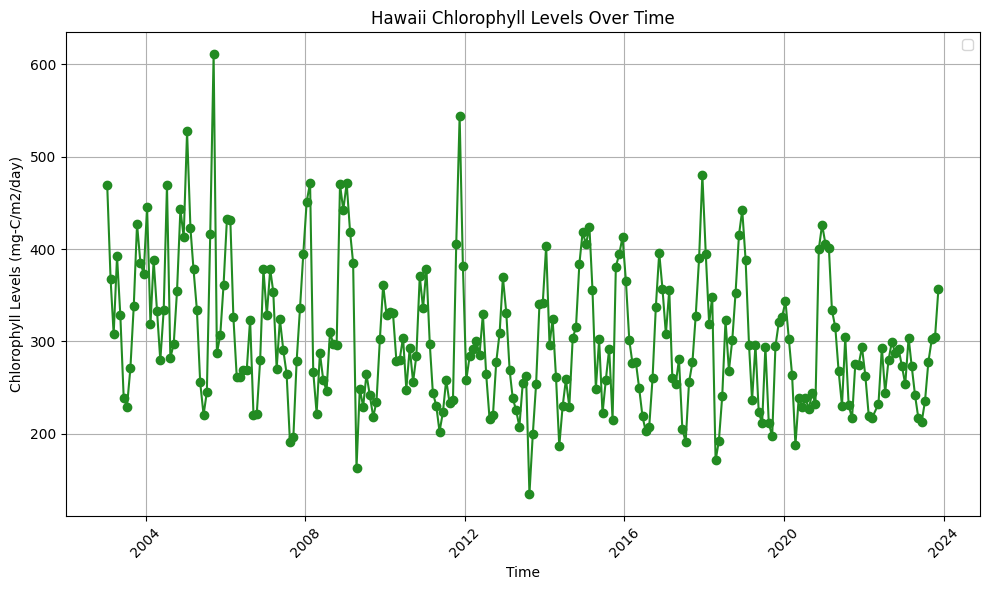

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(plank['time'], plank['Chlorophyll Levels (mg-C/m2/day)'], marker='o', linestyle='-', color='forestgreen')
plt.title('Hawaii Chlorophyll Levels Over Time')
plt.xlabel('Time')
plt.ylabel('Chlorophyll Levels (mg-C/m2/day)')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()


###Correlation

<ipython-input-97-ce73bf4fd31d>:8: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  ph_resampled = ph.resample('A').mean()
<ipython-input-97-ce73bf4fd31d>:9: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  co2_resampled = co2.resample('A').mean()
<ipython-input-97-ce73bf4fd31d>:10: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  temp_resampled = temp.resample('A').mean()
<ipython-input-97-ce73bf4fd31d>:11: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  volcano_resampled = volcano.resample('A').mean()
<ipython-input-97-ce73bf4fd31d>:12: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  plank_resampled = plank.resample('A').mean()
<ipython-input-97-ce73bf4fd31d>:13: FutureWarning: 'A' is deprecated and will be removed in a future

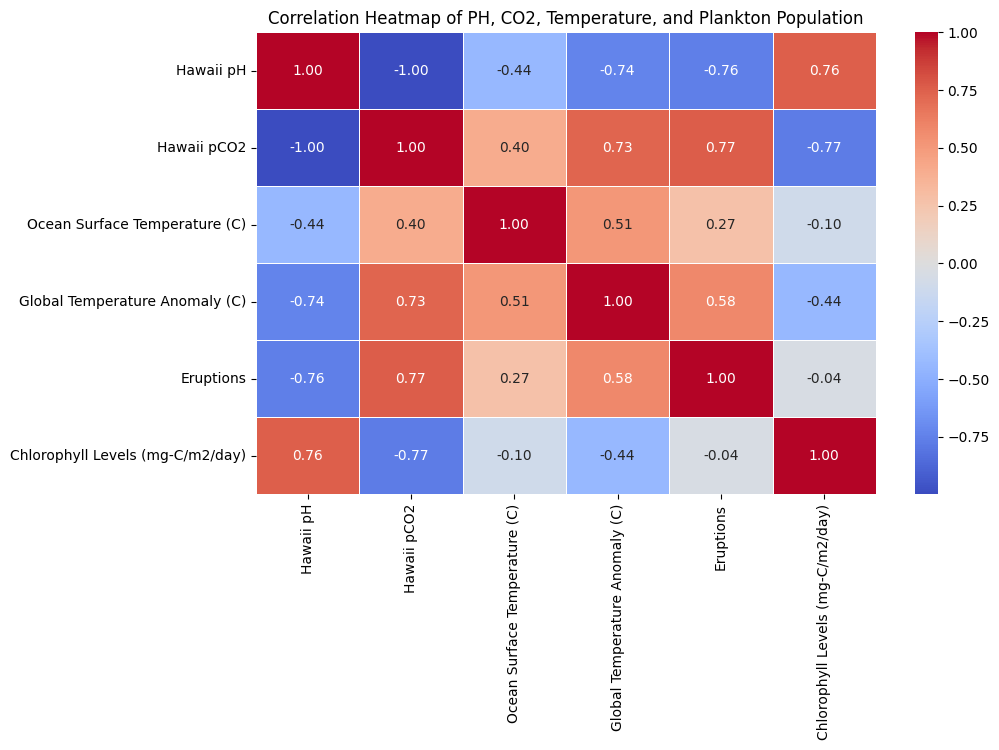

In [ ]:
ph.set_index('time', inplace=True)
co2.set_index('time', inplace=True)
temp.set_index('time', inplace=True)
volcano.set_index('time', inplace=True)
plank.set_index('time', inplace=True)
global_temp.set_index('time', inplace=True)

ph_resampled = ph.resample('A').mean()
co2_resampled = co2.resample('A').mean()
temp_resampled = temp.resample('A').mean()
volcano_resampled = volcano.resample('A').mean()
plank_resampled = plank.resample('A').mean()
global_temp_resampled = global_temp.resample('A').mean()

merged_df = pd.concat([ph_resampled, co2_resampled, temp_resampled, global_temp_resampled, volcano_resampled,plank_resampled], axis=1)

merged_df.interpolate(method='linear', inplace=True)

correlation_matrix = merged_df.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of PH, CO2, Temperature, and Plankton Population')
plt.show()


### Is she stationary

In [ ]:
ph_values = ph.values
res = adfuller(ph_values)
print('Augmneted Dickey_fuller Statistic: %f' % res[0])
print('p-value: %f' % res[1])
print('critical values at different levels:')
for k, v in res[4].items():
    print('\t%s: %.3f' % (k, v))

#she's non-stationary!

Augmneted Dickey_fuller Statistic: -0.231617
p-value: 0.934647
critical values at different levels:
	1%: -3.451
	5%: -2.871
	10%: -2.572


In [ ]:
co2_values = co2.values
res = adfuller(co2_values)
print('Augmneted Dickey_fuller Statistic: %f' % res[0])
print('p-value: %f' % res[1])
print('critical values at different levels:')
for k, v in res[4].items():
    print('\t%s: %.3f' % (k, v))

#she's non-stationary!

Augmneted Dickey_fuller Statistic: -0.404788
p-value: 0.909296
critical values at different levels:
	1%: -3.451
	5%: -2.871
	10%: -2.572


In [ ]:
temp_values = temp.values
res = adfuller(temp_values)
print('Augmneted Dickey_fuller Statistic: %f' % res[0])
print('p-value: %f' % res[1])
print('critical values at different levels:')
for k, v in res[4].items():
    print('\t%s: %.3f' % (k, v))

#she's stationary rip

Augmneted Dickey_fuller Statistic: -4.038607
p-value: 0.001221
critical values at different levels:
	1%: -3.435
	5%: -2.864
	10%: -2.568


In [ ]:
plank_values = plank.values
res = adfuller(plank_values)
print('Augmneted Dickey_fuller Statistic: %f' % res[0])
print('p-value: %f' % res[1])
print('critical values at different levels:')
for k, v in res[4].items():
    print('\t%s: %.3f' % (k, v))

#she's non-stationary!

Augmneted Dickey_fuller Statistic: -2.482144
p-value: 0.119879
critical values at different levels:
	1%: -3.458
	5%: -2.874
	10%: -2.573


In [ ]:
volcano_values = volcano['Eruptions'].values
res = adfuller(volcano_values)
print('Augmneted Dickey_fuller Statistic: %f' % res[0])
print('p-value: %f' % res[1])
print('critical values at different levels:')
for k, v in res[4].items():
    print('\t%s: %.3f' % (k, v))

Augmneted Dickey_fuller Statistic: -2.325380
p-value: 0.163913
critical values at different levels:
	1%: -3.621
	5%: -2.944
	10%: -2.610
